In [1]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train / 255
X_test = X_test / 255

2023-03-19 13:12:58.364169: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-19 13:12:58.866255: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-19 13:12:58.866278: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-19 13:13:00.357210: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ann import ann
import ann_utils
import gd

In [3]:
# Set Hyperparameters
epochs = 10
ann.num_layers = 5
ann.hidden_size = 4
ann.batch_size = 1000

In [4]:
## Functions
# ann.activation = ann_utils.tanh
# ann.d_activation = ann_utils.d_tanh
ann.activation = ann_utils.tanh
ann.d_activation = ann_utils.d_tanh
ann.weight_init = ann_utils.xavier_init

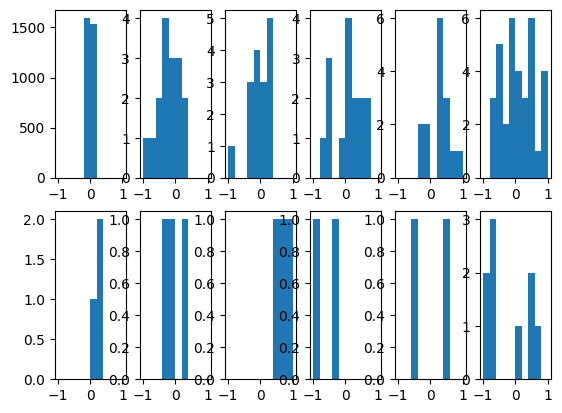

In [5]:
# Define an ANN.
nn = ann(28 * 28, 10)
ann_utils.view_weights_distribution(nn, ann.num_layers, -1, 1)

In [6]:
# Train the ANN.

for i in range(epochs):
    gd.batch_gd(nn, X_train, y_train)

0
6
7
2
0
6
6
2
1
7
6
4
9
9
6
9
1
5
6
0
2
1
1
3
0
0
5
4
1
5
6
7
0
9
9
2
5
8
6
6
4
7
4
3
6
0
1
6
0
7
0
0
5
6
6
9
5
9
6
7
7
3
6
5
6
2
3
1
3
1
0
6
5
4
8
1
5
6
3
4
8
1
5
2
1
8
7
5
0
3
8
2
8
7
4
1
9
5
5
2
1
9
1
8
8
1
8
0
4
6
5
1
4
7
8
5
2
7
8
4
6
1
3
8
5
6
9
2
3
6
4
0
6
6
6
3
0
1
8
9
1
9
0
7
6
9
2
8
9
3
4
6
8
5
0
6
1
8
3
0
1
4
8
1
9
8
5
8
3
7
8
8
7
0
1
3
5
4
7
2
9
1
0
9
1
0
5
4
6
9
7
0
5
9
7
4
5
9
8
4
3
4
5
4
7
1
5
4
0
9
1
0
2
7
5
6
1
0
1
3
6
7
5
1
7
1
6
7
6
9
5
5
5
4
2
6
6
4
7
5
5
1
7
4
1
9
1
1
3
8
8
4
0
3
8
0
3
7
4
3
9
4
7
6
7
9
3
8
9
4
1
0
4
2
6
9
1
7
1
9
9
1
7
9
0
4
4
6
9
8
2
5
6
6
3
3
8
7
4
9
2
4
3
3
7
6
2
8
0
9
6
1
1
5
4
7
6
2
8
7
9
6
6
5
7
0
3
1
3
8
2
7
4
4
9
2
4
5
8
2
6
3
0
1
5
6
7
3
7
8
8
2
6
3
7
3
2
0
5
7
4
4
8
5
9
9
2
7
8
7
8
8
6
8
2
2
5
5
9
2
8
9
6
1
5
9
4
4
5
6
8
3
3
9
7
6
8
8
1
3
1
2
3
7
1
5
5
6
7
2
2
4
7
6
5
8
8
0
0
4
2
7
0
9
1
9
1
4
1
2
4
2
9
7
7
0
6
7
5
3
0
8
6
2
4
5
0
2
3
0
0
6
4
2
8
9
1
1
8
9
9
1
2
5
2
7
0
1
3
3
8
7
1
9
0
7
4
6
8
9
5
1
4
7
7
4
8
8
6
9
0
8
5
0
8
9
3
4
5
9


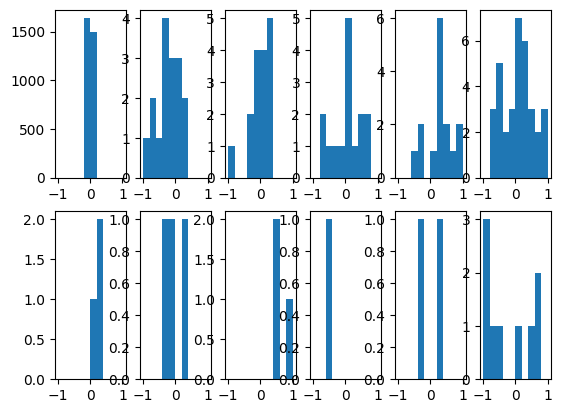

In [7]:
ann_utils.view_weights_distribution(nn, ann.num_layers, -1, 1)

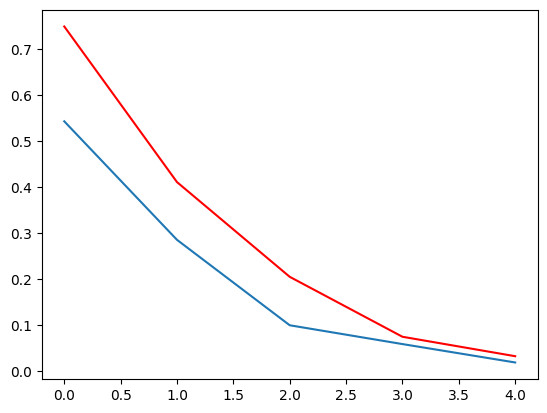

In [8]:
i, j = 1, 500
u = nn.predict(X_train[i])
ua = nn.a
uh = nn.h

v = nn.predict(X_train[j])
va = nn.a
vh = nn.h

diffa = []
diffh = []

for i in range(len(va)):
    diffh.append(np.linalg.norm(vh[i] - uh[i]))
    diffa.append(np.linalg.norm(va[i] - ua[i]))

plt.plot(diffh)
plt.plot(diffa, 'r')

In [9]:
print(ua[0])
print(va[0])
print(uh[0])
print(vh[0])

[[-0.44976171]
 [-1.09526811]
 [ 0.38615452]
 [-0.01289447]]
[[-0.70752182]
 [-1.54520478]
 [ 0.41227407]
 [ 0.52729345]]
[[-0.42170311]
 [-0.79879287]
 [ 0.36804035]
 [-0.01289376]]
[[-0.60912048]
 [-0.91299082]
 [ 0.39040186]
 [ 0.48330947]]


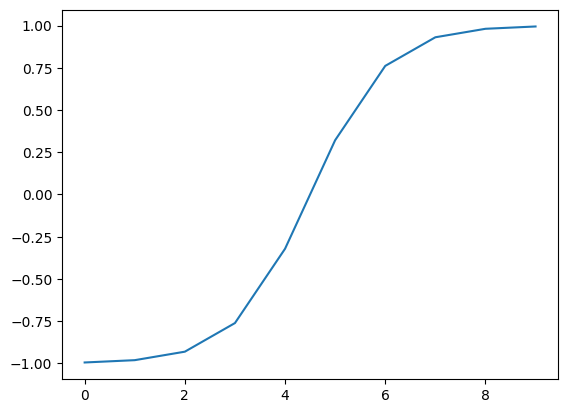

In [10]:
plt.plot(ann_utils.tanh(np.linspace(-3, 3, 10)))

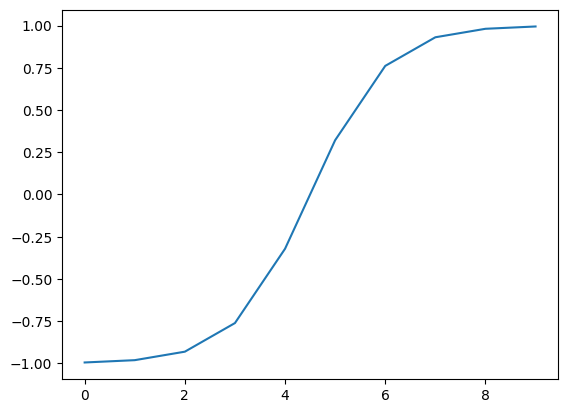

In [11]:
plt.plot(np.tanh(np.linspace(-3, 3, 10)))